In [22]:
import torch
import torchvision
import numpy as np
import random
import os
import cv2

from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
import numpy as np
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

from torchvision import transforms
from sklearn.metrics import accuracy_score

from PIL import Image
import glob

import matplotlib.pyplot as plt

from numpy import asarray

In [8]:
# read in images using glob and cv2
array_images = []

all_images = []
labels = []

for filename in glob.glob('./datasets/Non_Demented/*.jpg'): #assuming jpg files
    im=Image.open(filename)
    data = asarray(im)
    array_images.append((data, "non_demented"))
    
    img = cv2.imread(filename, cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(img, (28, 28))  # Resize the image to 28x28 pixels
    all_images.append(img.reshape(-1))  # Flatten the image to a 1D array
    labels.append("non_demented")
    
for filename in glob.glob('./datasets/Mild_Demented/*.jpg'): #assuming jpg files
    im=Image.open(filename)
    data = asarray(im)
    array_images.append((data, "mild_demented"))
    im.close()
    
    img = cv2.imread(filename, cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(img, (28, 28))  # Resize the image to 28x28 pixels
    all_images.append(img.reshape(-1))  # Flatten the image to a 1D array
    labels.append("mild_demented")

for filename in glob.glob('./datasets/Very_Mild_Demented/*.jpg'): #assuming jpg files
    im=Image.open(filename)
    data = asarray(im)
    array_images.append((data, "very_mild_demented"))
    im.close()
    
    img = cv2.imread(filename, cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(img, (28, 28))  # Resize the image to 28x28 pixels
    all_images.append(img.reshape(-1))  # Flatten the image to a 1D array
    labels.append("very_mild_demented")

for filename in glob.glob('./datasets/Moderate_Demented/*.jpg'): #assuming jpg files
    im=Image.open(filename)
    data = asarray(im)
    array_images.append([data, "moderate_demented"])
    im.close()
    
    img = cv2.imread(filename, cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(img, (28, 28))  # Resize the image to 28x28 pixels
    all_images.append(img.reshape(-1))  # Flatten the image to a 1D array
    labels.append("moderate_demented")

In [18]:
# train SVC
X_train, X_test, y_train, y_test = train_test_split(all_images, labels, test_size=0.2, random_state=42)
clf = SVC(kernel='poly', C=1.0, gamma='auto')
clf.fit(X_train, y_train)

# draw predictions
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.98828125


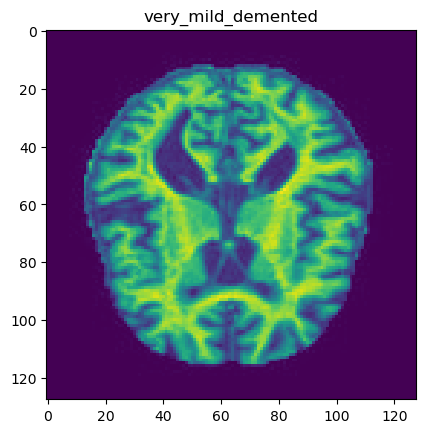

In [12]:
# show images 
plt.imshow(array_images[6000][0], interpolation='nearest')
plt.title(labels[6000])
plt.show()

In [23]:
#Neural Net
clf2 = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(5, 2), random_state=1)
clf2.fit(X_train, y_train)
y_pred2 = clf2.predict(X_test)
accuracy = accuracy_score(y_test, y_pred2)
print(f'Neural Net Accuracy: {accuracy}')

Neural Net Accuracy: 0.52109375
